In [1]:
###  Reading, Understanding and Visualizing

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
df= pd.read_csv('day.csv')

In [234]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [235]:
df.shape

(730, 16)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [237]:
df=df.drop(['instant', 'dtedate'], axis=1)

KeyError: "['dtedate'] not found in axis"

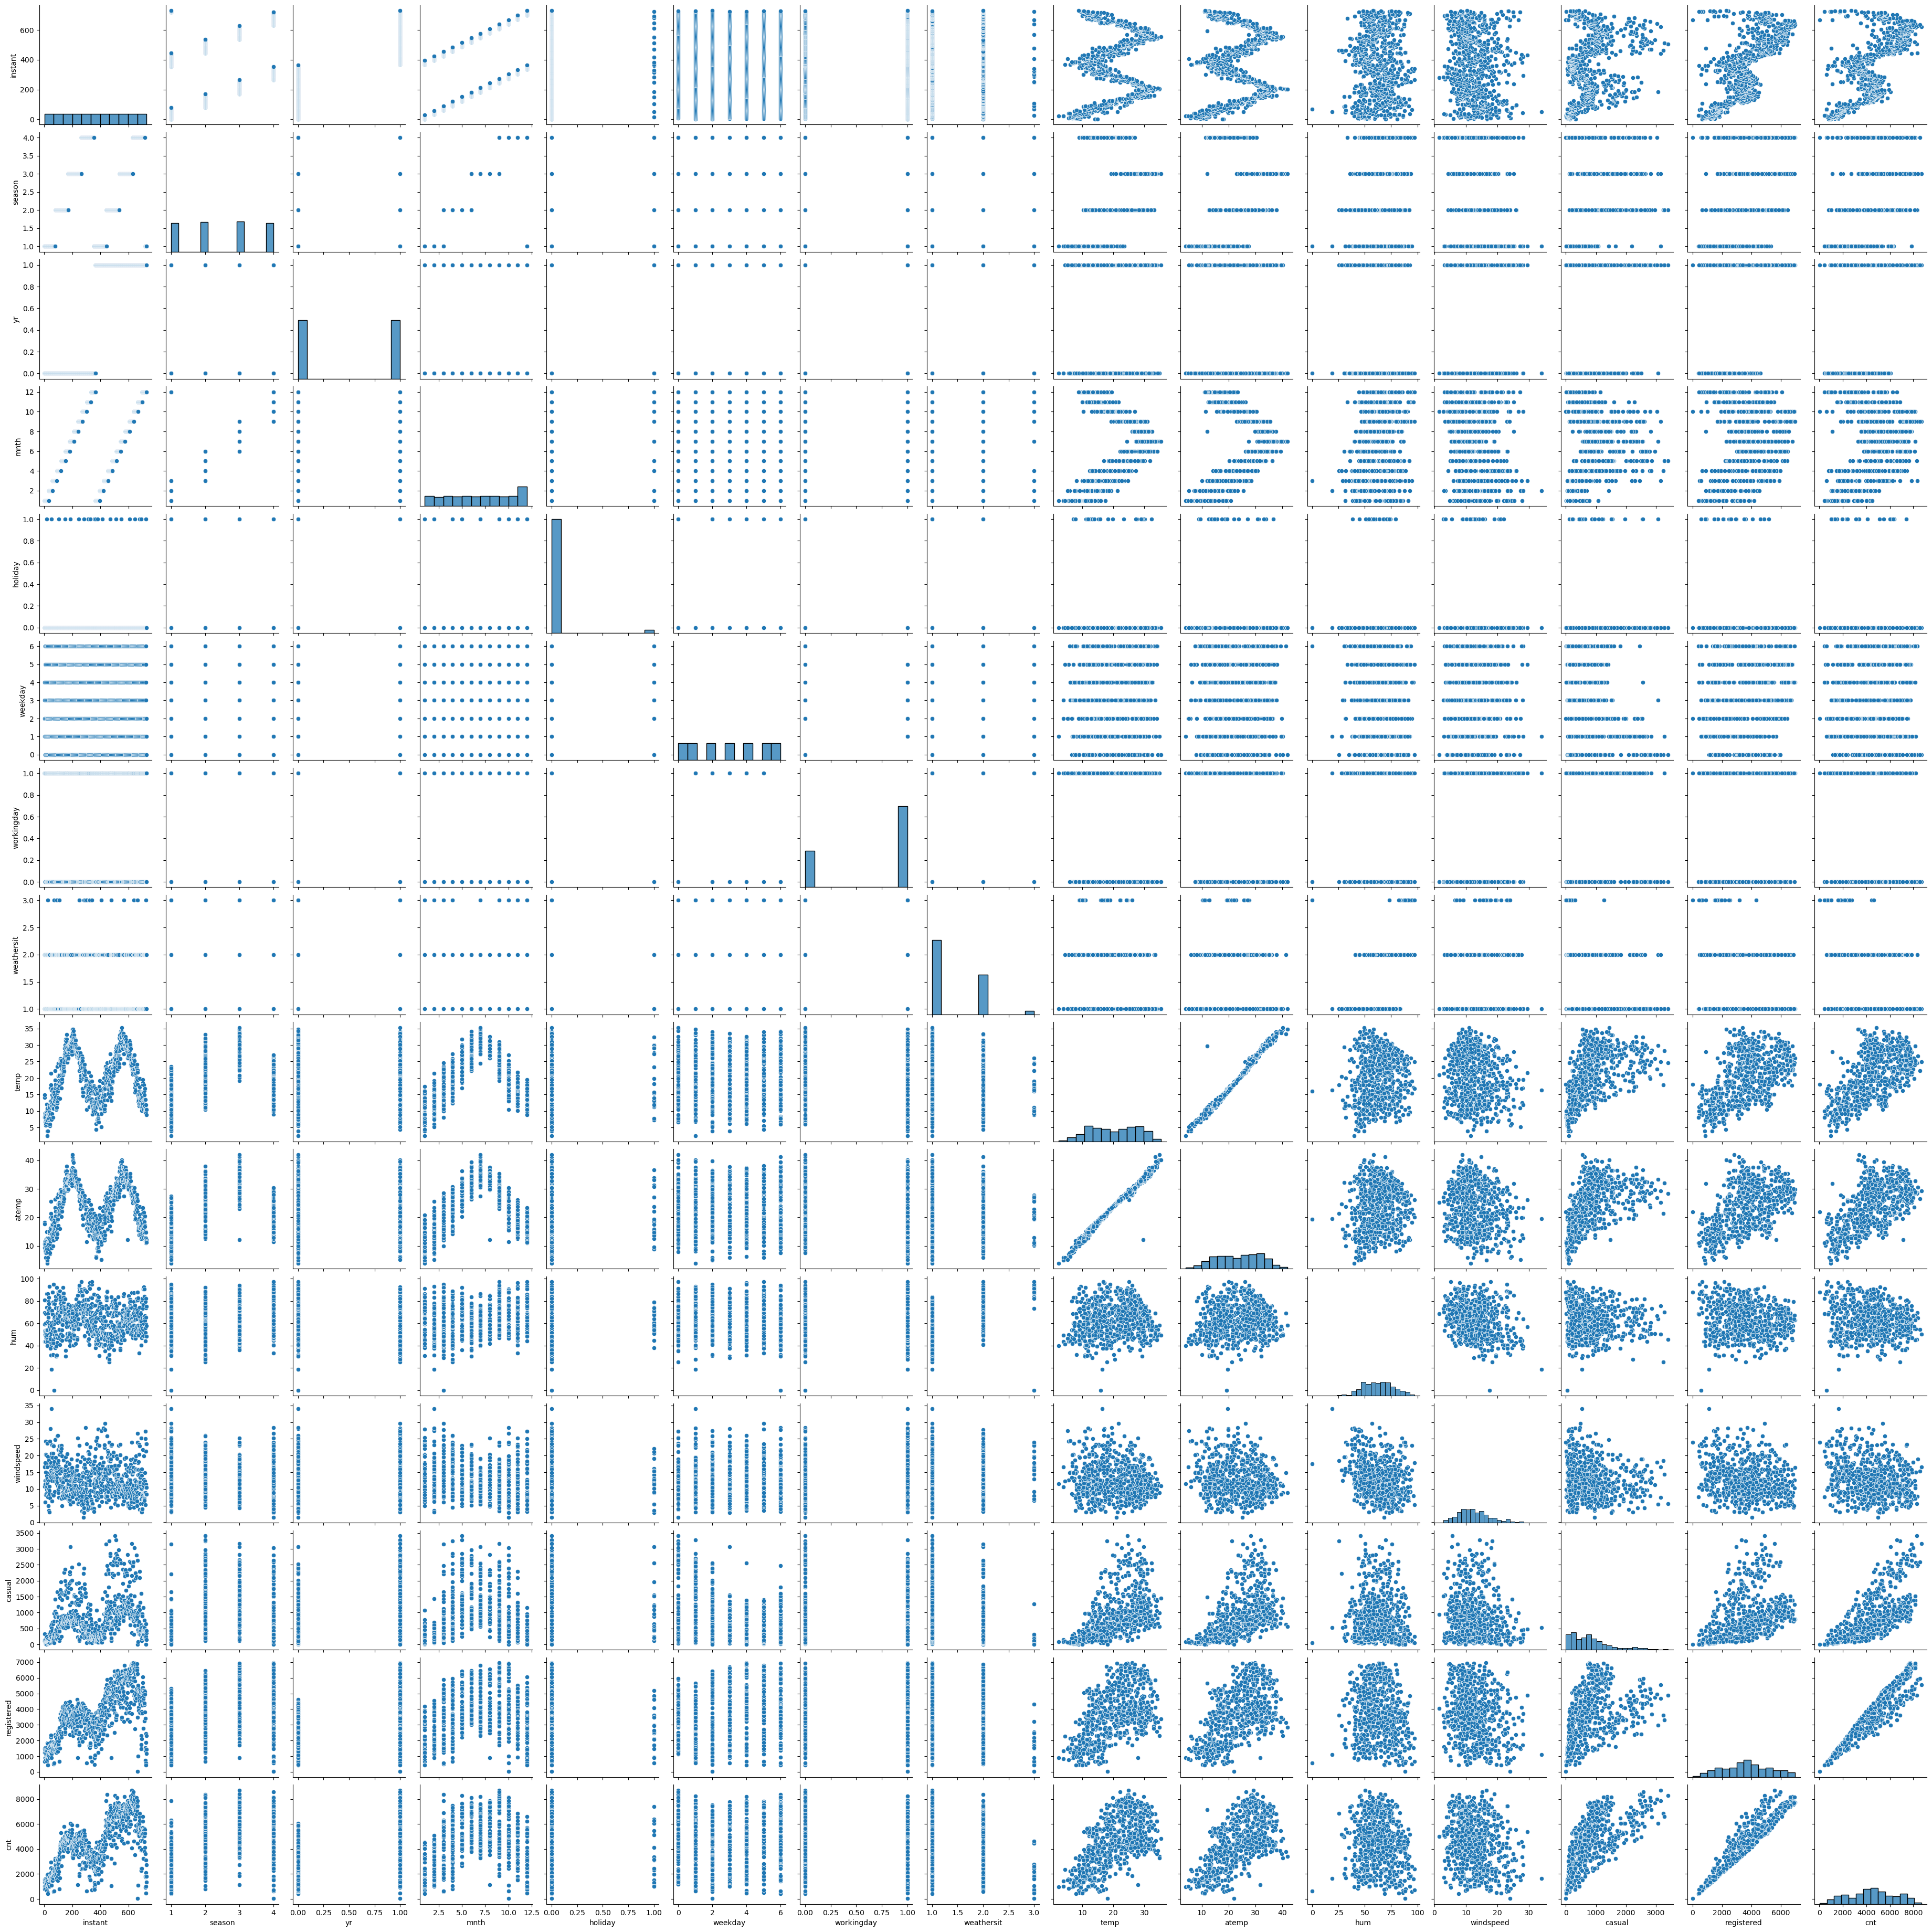

In [238]:
#Visualizing

sns.pairplot(df)
plt.show()

### Preparing the data for modelling
- Encoding
   - Convert into Categorical Columns (binary to 0/1)
   - Create Dummy Variables 
-  Split into train and test model  
- Rescaling of Variables

### Convert to Categorical Columns
 

In [239]:
df['season']= df.season.apply(lambda x : "spring" if x==1 else ("summer" if x==2 else ("fall" if x==3 else "winter")))

In [240]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [241]:
df['weathersit']= df.weathersit.apply(lambda x : "Clear" if x==1 else ("Mist" if x==2 else ("Light Rain" if x==3 else "Heavy Rain")))

In [242]:
df['weathersit'].value_counts()

Clear         463
Mist          246
Light Rain     21
Name: weathersit, dtype: int64

use BoxPlot to check outlier

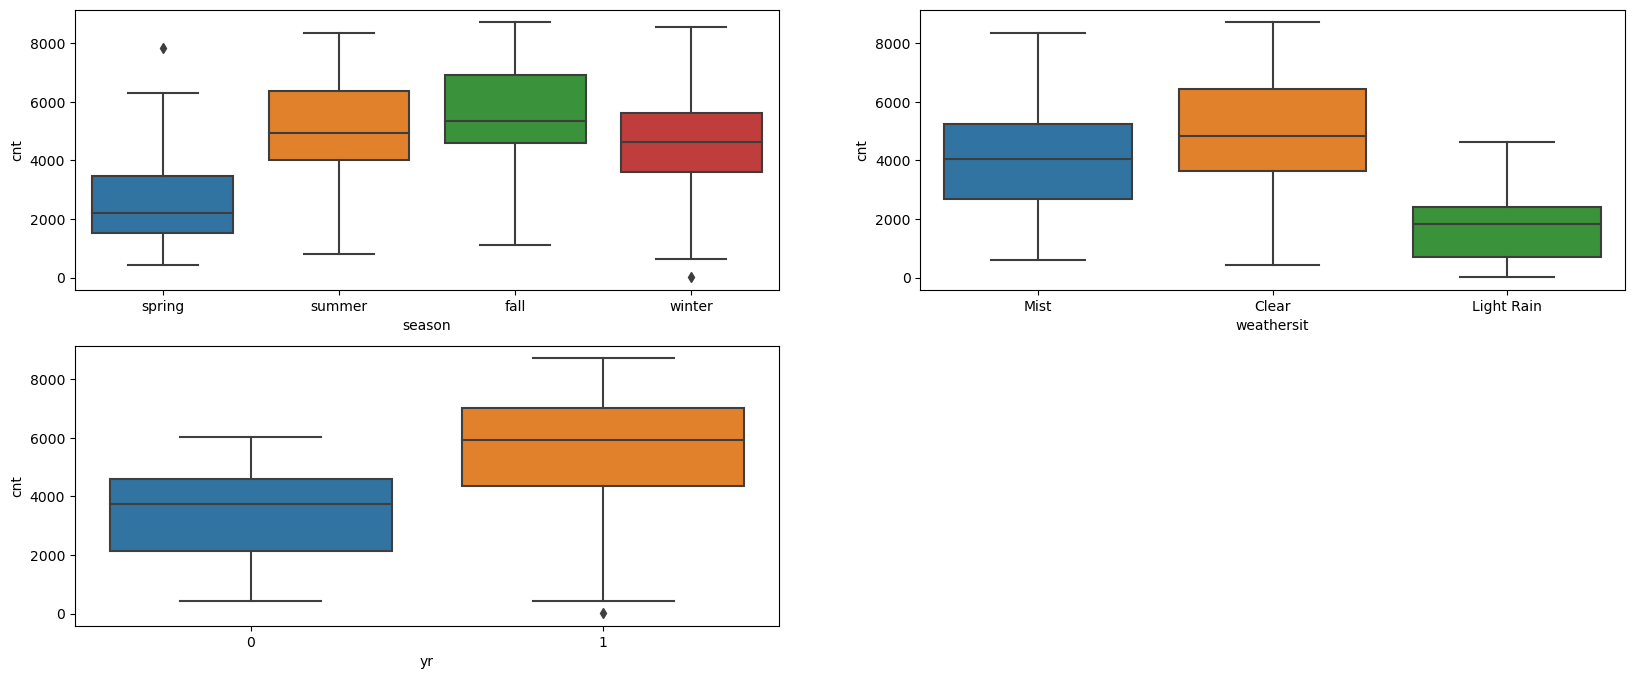

In [243]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,2,2)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2,2,3)
sns.boxplot(x='yr', y='cnt', data=df)
plt.show()

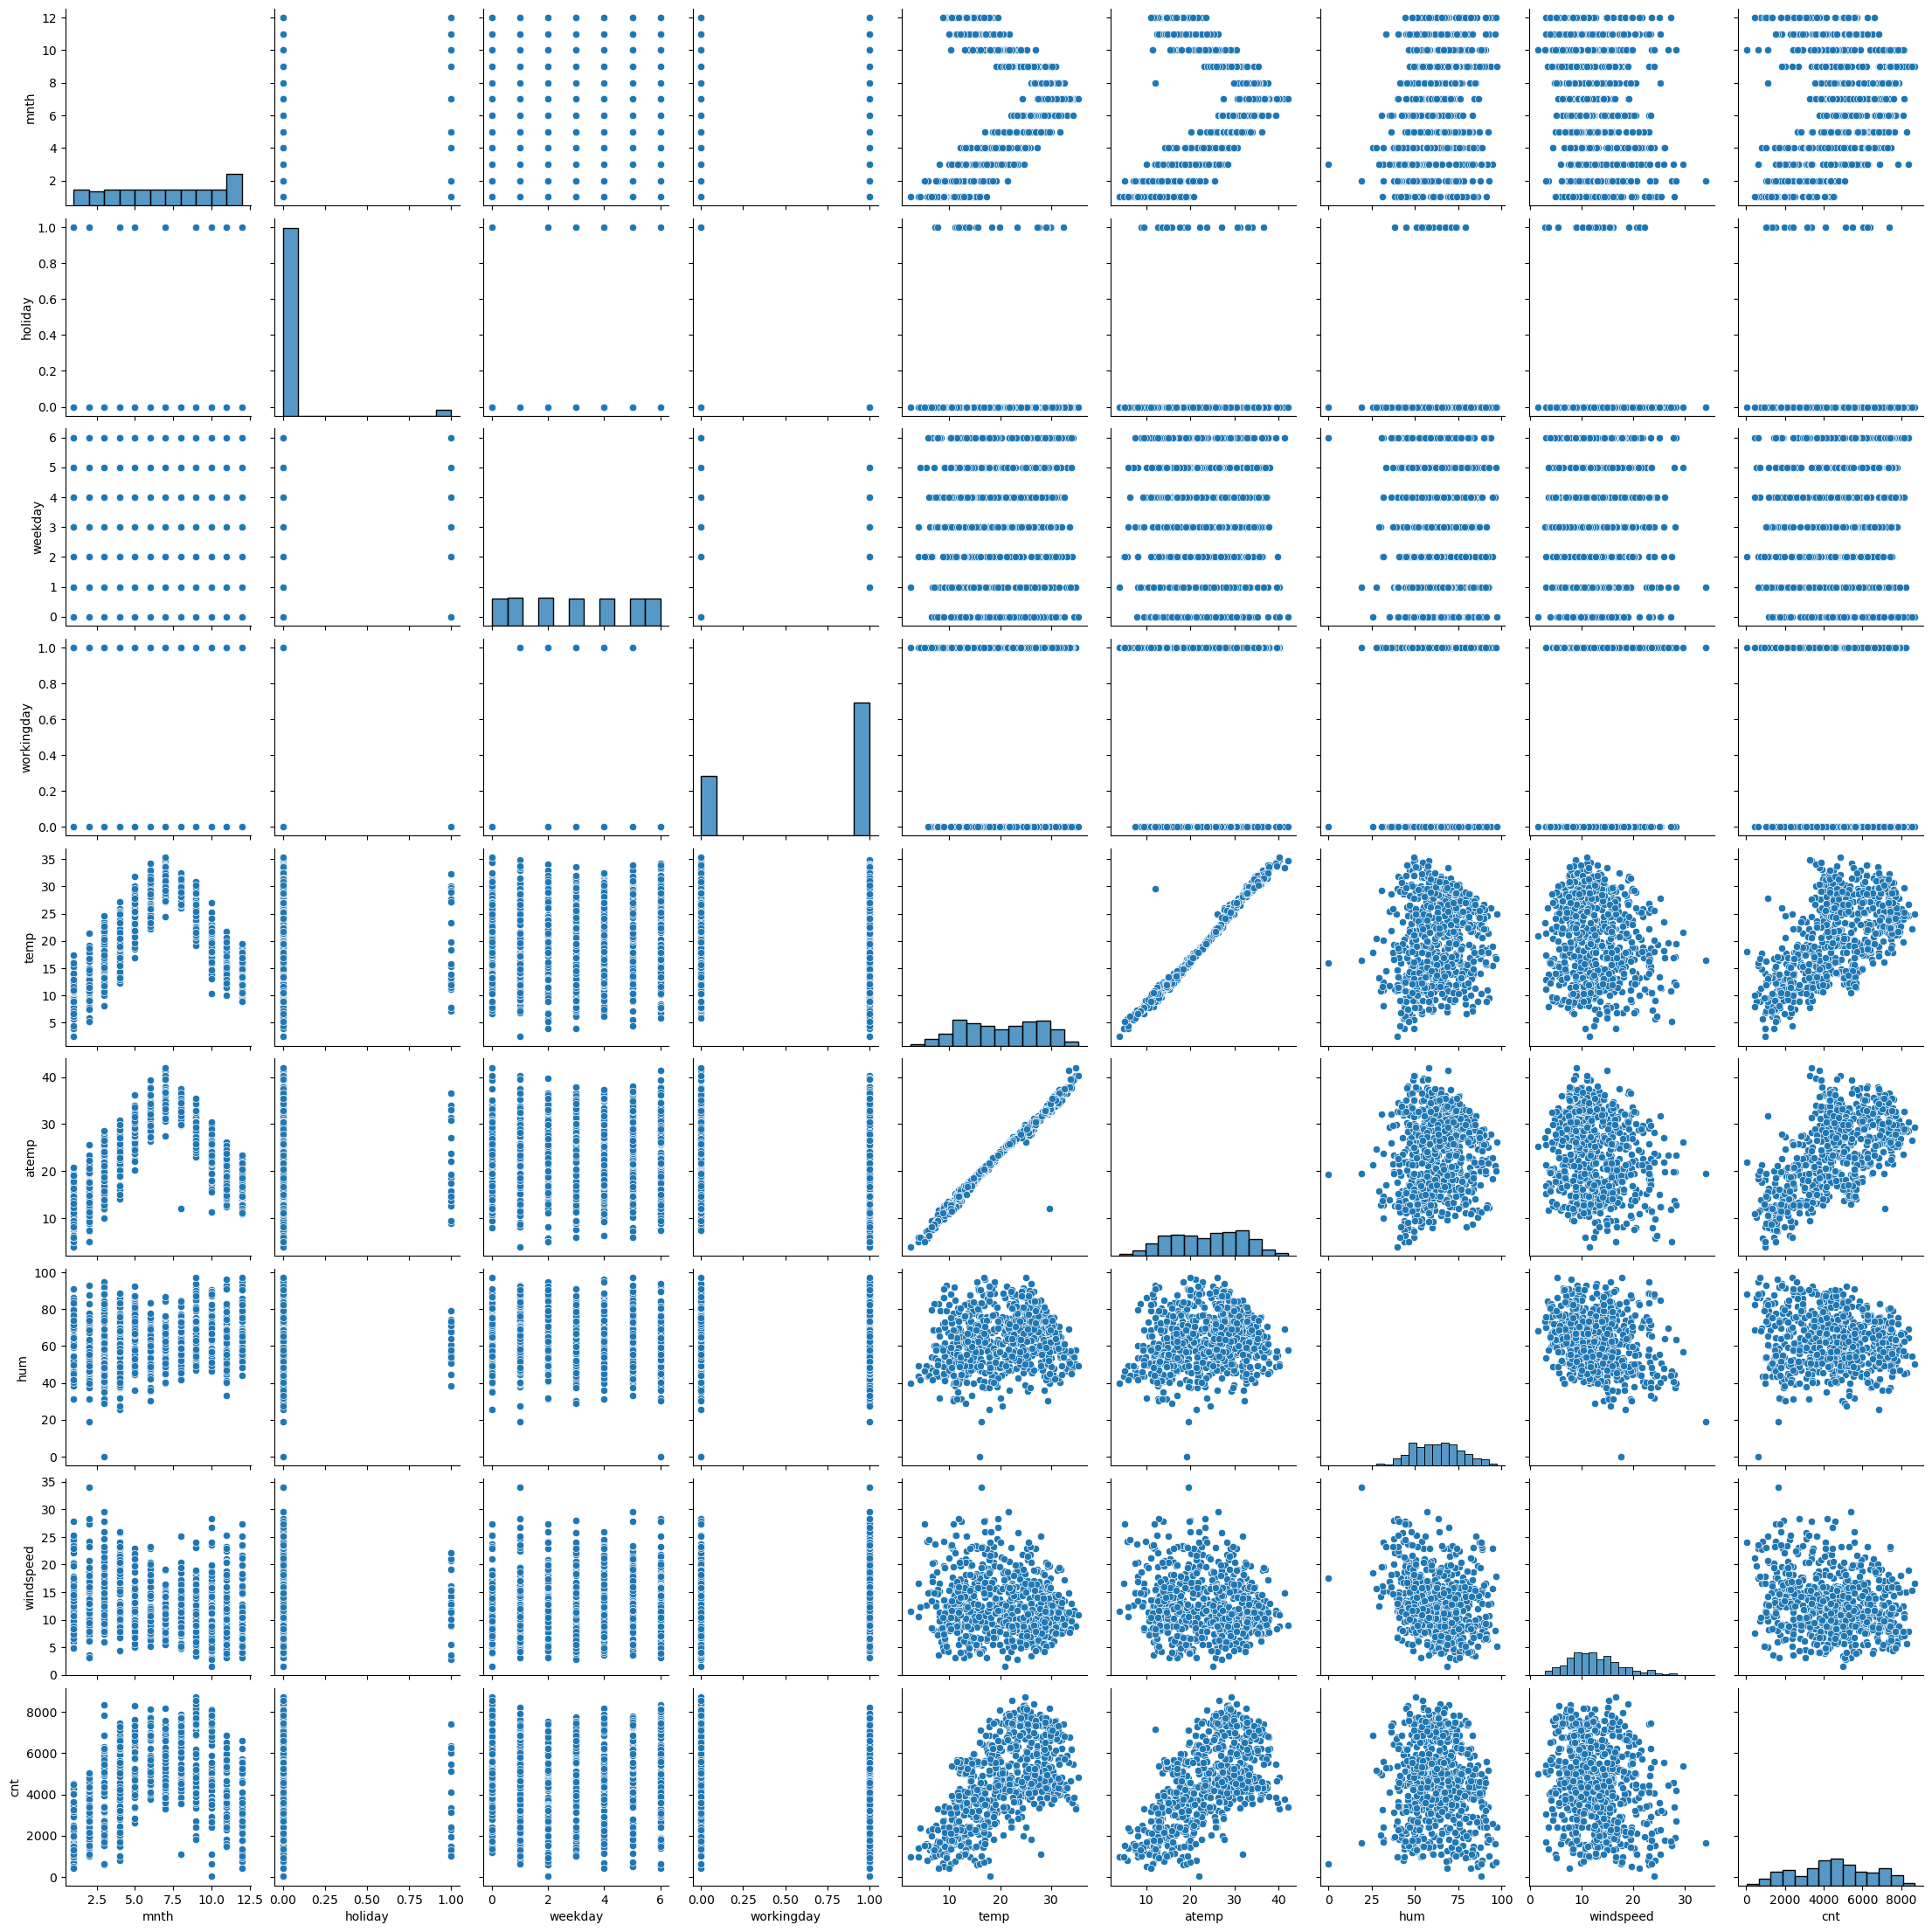

In [244]:
#Visualizing
num_var=[ 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df[num_var])
plt.show()

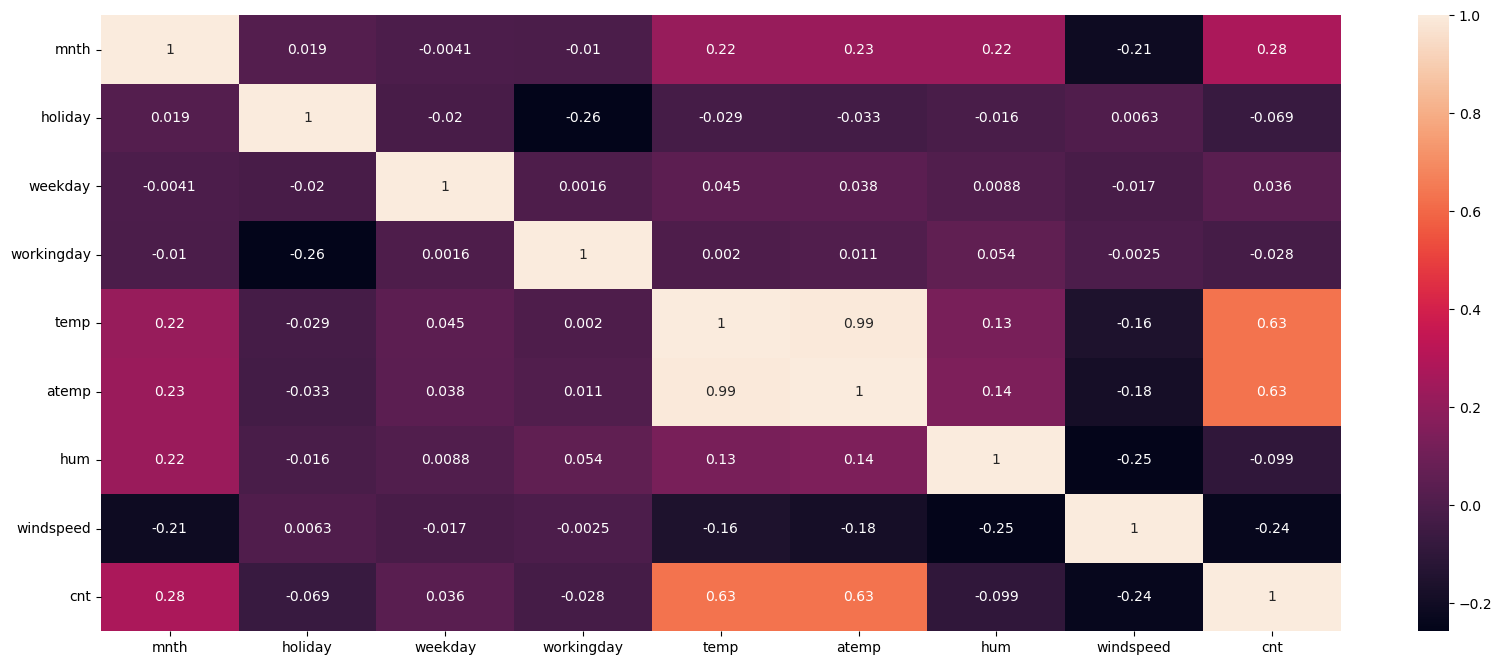

In [245]:
plt.figure(figsize=(20,8))
sns.heatmap(df[num_var].corr(), annot=True)
plt.show()

In [ ]:
temp and atemp
temp cnt
atemp cnt

### create dummy vars

In [246]:
season_dummy= pd.get_dummies(df['season'])

In [264]:
season_dummy.head()

summer  winter
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0

In [265]:
season_dummy= pd.get_dummies(df['season'], drop_first=True)

KeyError: 'season'

In [ ]:
season_dummy.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [ ]:
season_dummy= pd.get_dummies(df['season'], drop_first=True)
season_dummy.drop(['spring'], axis=1, inplace=True)
season_dummy.head()

summer  winter
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0

Summer-Winter
00- Spring
01- Winter
10= Summer
11= fall

In [ ]:
weathersit_dummy= pd.get_dummies(df['weathersit'])
weathersit_dummy.head()

Clear  Light Rain  Mist
0      0           0     1
1      0           0     1
2      1           0     0
3      1           0     0
4      1           0     0

In [ ]:
weathersit_dummy= pd.get_dummies(df['weathersit'], drop_first=True)
weathersit_dummy.head()

Light Rain  Mist
0           0     1
1           0     1
2           0     0
3           0     0
4           0     0

LightRain- Mist
00- clear
10- lightRain
01-Mist
11- HeavyRain (althrough, this is not present)

In [ ]:
df= pd.concat([df, season_dummy, weathersit_dummy], axis=1)
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        1           1   
1        2  02-01-2018  spring   0     1        0        2           1   
2        3  03-01-2018  spring   0     1        0        3           1   
3        4  04-01-2018  spring   0     1        0        4           1   
4        5  05-01-2018  spring   0     1        0        5           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  summer  winter  Light Rain  Mist  
0   985       0       0           0     1  
1   801       0       0           0     1  
2  1349       0       0           0     0  
3  1562       0       0           0     0  
4  1600       0       0           0     0

In [ ]:
df.drop(['season', 'weathersit'], axis=1, inplace=True)
df.head()

instant      dteday  yr  mnth  holiday  weekday  workingday       temp  \
0        1  01-01-2018   0     1        0        1           1  14.110847   
1        2  02-01-2018   0     1        0        2           1  14.902598   
2        3  03-01-2018   0     1        0        3           1   8.050924   
3        4  04-01-2018   0     1        0        4           1   8.200000   
4        5  05-01-2018   0     1        0        5           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  summer  winter  \
0  18.18125  80.5833  10.749882     331         654   985       0       0   
1  17.68695  69.6087  16.652113     131         670   801       0       0   
2   9.47025  43.7273  16.636703     120        1229  1349       0       0   
3  10.60610  59.0435  10.739832     108        1454  1562       0       0   
4  11.46350  43.6957  12.522300      82        1518  1600       0       0   

   Light Rain  Mist  
0           0     1  
1           0     1  
2           0     0  
3           0     0  
4           0     0

In [ ]:
mnth_dummy= pd.get_dummies(df['mnth'], prefix='month_', drop_first=True)
mnth_dummy

month__2  month__3  month__4  month__5  month__6  month__7  month__8  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
725         0         0         0         0         0         0         0   
726         0         0         0         0         0         0         0   
727         0         0         0         0         0         0         0   
728         0         0         0         0         0         0         0   
729         0         0         0         0         0         0         0   

     month__9  month__10  month__11  month__12  
0           0          0          0          0  
1           0          0          0          0  
2           0          0          0          0  
3           0          0          0          0  
4           0          0          0          0  
..        ...        ...        ...        ...  
725         0          0          0          1  
726         0          0          0          1  
727         0          0          0          1  
728         0          0          0          1  
729         0          0          0          1  

[730 rows x 11 columns]

In [ ]:
df= pd.concat([df, season_dummy, weathersit_dummy, mnth_dummy ], axis=1)
#df= pd.concat([df, mnth_dummy ], axis=1)
df.drop(['instant', 'dteday'], axis=1, inplace=True)
df.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        1           1  14.110847  18.18125  80.5833   
1   0     1        0        2           1  14.902598  17.68695  69.6087   
2   0     1        0        3           1   8.050924   9.47025  43.7273   
3   0     1        0        4           1   8.200000  10.60610  59.0435   
4   0     1        0        5           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  month__3  month__4  month__5  month__6  month__7  \
0  10.749882     331  ...         0         0         0         0         0   
1  16.652113     131  ...         0         0         0         0         0   
2  16.636703     120  ...         0         0         0         0         0   
3  10.739832     108  ...         0         0         0         0         0   
4  12.522300      82  ...         0         0         0         0         0   

   month__8  month__9  month__10  month__11  month__12  
0         0         0          0          0          0  
1         0         0          0          0          0  
2         0         0          0          0          0  
3         0         0          0          0          0  
4         0         0          0          0          0  

[5 rows x 61 columns]

In [266]:
df=df.drop('mnth', axis=True)
df=df.drop(['registered','casual'], axis=True)

### Split into train and test

In [267]:
from  sklearn.model_selection import train_test_split

In [268]:
df_train, df_test= train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [269]:
df_train.head()

yr  holiday  weekday  workingday       temp    atemp      hum  windspeed  \
653   1        0        3           1  19.201653  23.0423  55.8333  12.208807   
576   1        0        3           1  29.246653  33.1448  70.4167  11.083475   
426   1        0        0           0  16.980847  20.6746  62.1250  10.792293   
728   1        0        1           1  10.489153  11.5850  48.3333  23.500518   
482   1        0        0           0  15.443347  18.8752  48.9583   8.708325   

      cnt  summer  ...  month__3  month__4  month__5  month__6  month__7  \
653  7534       0  ...         0         0         0         0         0   
576  7216       0  ...         0         0         0         0         1   
426  4066       0  ...         1         0         0         0         0   
728  1796       0  ...         0         0         0         0         0   
482  4220       1  ...         0         1         0         0         0   

     month__8  month__9  month__10  month__11  month__12  
653         0         0          1          0          0  
576         0         0          0          0          0  
426         0         0          0          0          0  
728         0         0          0          0          1  
482         0         0          0          0          0  

[5 rows x 58 columns]

In [270]:
print(df_train.shape)
print(df_test.shape)

(510, 58)
(219, 58)


### Rescaling the variables
- Minmax()
- Standarization

In [271]:
# Instantiate the object
from sklearn.preprocessing import MinMaxScaler


In [272]:
scaler= MinMaxScaler()

In [273]:
df_train.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'summer', 'winter', 'Light Rain', 'Mist', 'summer',
       'winter', 'Light Rain', 'Mist', 'month__2', 'month__3', 'month__4',
       'month__5', 'month__6', 'month__7', 'month__8', 'month__9', 'month__10',
       'month__11', 'month__12', 'summer', 'winter', 'Light Rain', 'Mist',
       'month__2', 'month__3', 'month__4', 'month__5', 'month__6', 'month__7',
       'month__8', 'month__9', 'month__10', 'month__11', 'month__12', 'summer',
       'winter', 'Light Rain', 'Mist', 'month__2', 'month__3', 'month__4',
       'month__5', 'month__6', 'month__7', 'month__8', 'month__9', 'month__10',
       'month__11', 'month__12'],
      dtype='object')

In [274]:

num_var=[  'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed' , 'cnt']

In [275]:
df_train[num_var]= scaler.fit_transform(df_train[num_var])
df_train.head()

yr  holiday   weekday  workingday      temp     atemp       hum  \
653   1        0  0.500000         1.0  0.509887  0.501133  0.575354   
576   1        0  0.500000         1.0  0.815169  0.766351  0.725633   
426   1        0  0.000000         0.0  0.442393  0.438975  0.640189   
728   1        0  0.166667         1.0  0.245101  0.200348  0.498067   
482   1        0  0.000000         0.0  0.395666  0.391735  0.504508   

     windspeed       cnt  summer  ...  month__3  month__4  month__5  month__6  \
653   0.300794  0.864243       0  ...         0         0         0         0   
576   0.264686  0.827658       0  ...         0         0         0         0   
426   0.255342  0.465255       0  ...         1         0         0         0   
728   0.663106  0.204096       0  ...         0         0         0         0   
482   0.188475  0.482973       1  ...         0         1         0         0   

     month__7  month__8  month__9  month__10  month__11  month__12  
653         0         0         0          1          0          0  
576         1         0         0          0          0          0  
426         0         0         0          0          0          0  
728         0         0         0          0          0          1  
482         0         0         0          0          0          0  

[5 rows x 58 columns]

In [276]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   weekday     510 non-null    float64
 3   workingday  510 non-null    float64
 4   temp        510 non-null    float64
 5   atemp       510 non-null    float64
 6   hum         510 non-null    float64
 7   windspeed   510 non-null    float64
 8   cnt         510 non-null    float64
 9   summer      510 non-null    uint8  
 10  winter      510 non-null    uint8  
 11  Light Rain  510 non-null    uint8  
 12  Mist        510 non-null    uint8  
 13  summer      510 non-null    uint8  
 14  winter      510 non-null    uint8  
 15  Light Rain  510 non-null    uint8  
 16  Mist        510 non-null    uint8  
 17  month__2    510 non-null    uint8  
 18  month__3    510 non-null    uint8  
 19  month__4    510 non-null    

In [277]:
df_train.describe()

yr     holiday     weekday  workingday        temp       atemp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.491830    0.711765    0.537262    0.512989   
std      0.500429    0.157763    0.329528    0.453386    0.225844    0.212385   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.166667    0.000000    0.339853    0.332086   
50%      1.000000    0.000000    0.500000    1.000000    0.540519    0.526811   
75%      1.000000    0.000000    0.833333    1.000000    0.735215    0.688457   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              hum   windspeed         cnt      summer  ...    month__3  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.650369    0.320768    0.513620    0.245098  ...    0.098039   
std      0.145882    0.169797    0.224593    0.430568  ...    0.297660   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.538643    0.199179    0.356420    0.000000  ...    0.000000   
50%      0.653714    0.296763    0.518638    0.000000  ...    0.000000   
75%      0.754830    0.414447    0.684710    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

         month__4    month__5    month__6    month__7    month__8    month__9  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.078431    0.084314    0.074510    0.076471    0.096078    0.080392   
std      0.269113    0.278131    0.262857    0.266010    0.294988    0.272166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month__10   month__11   month__12  
count  510.000000  510.000000  510.000000  
mean     0.086275    0.086275    0.084314  
std      0.281045    0.281045    0.278131  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 58 columns]

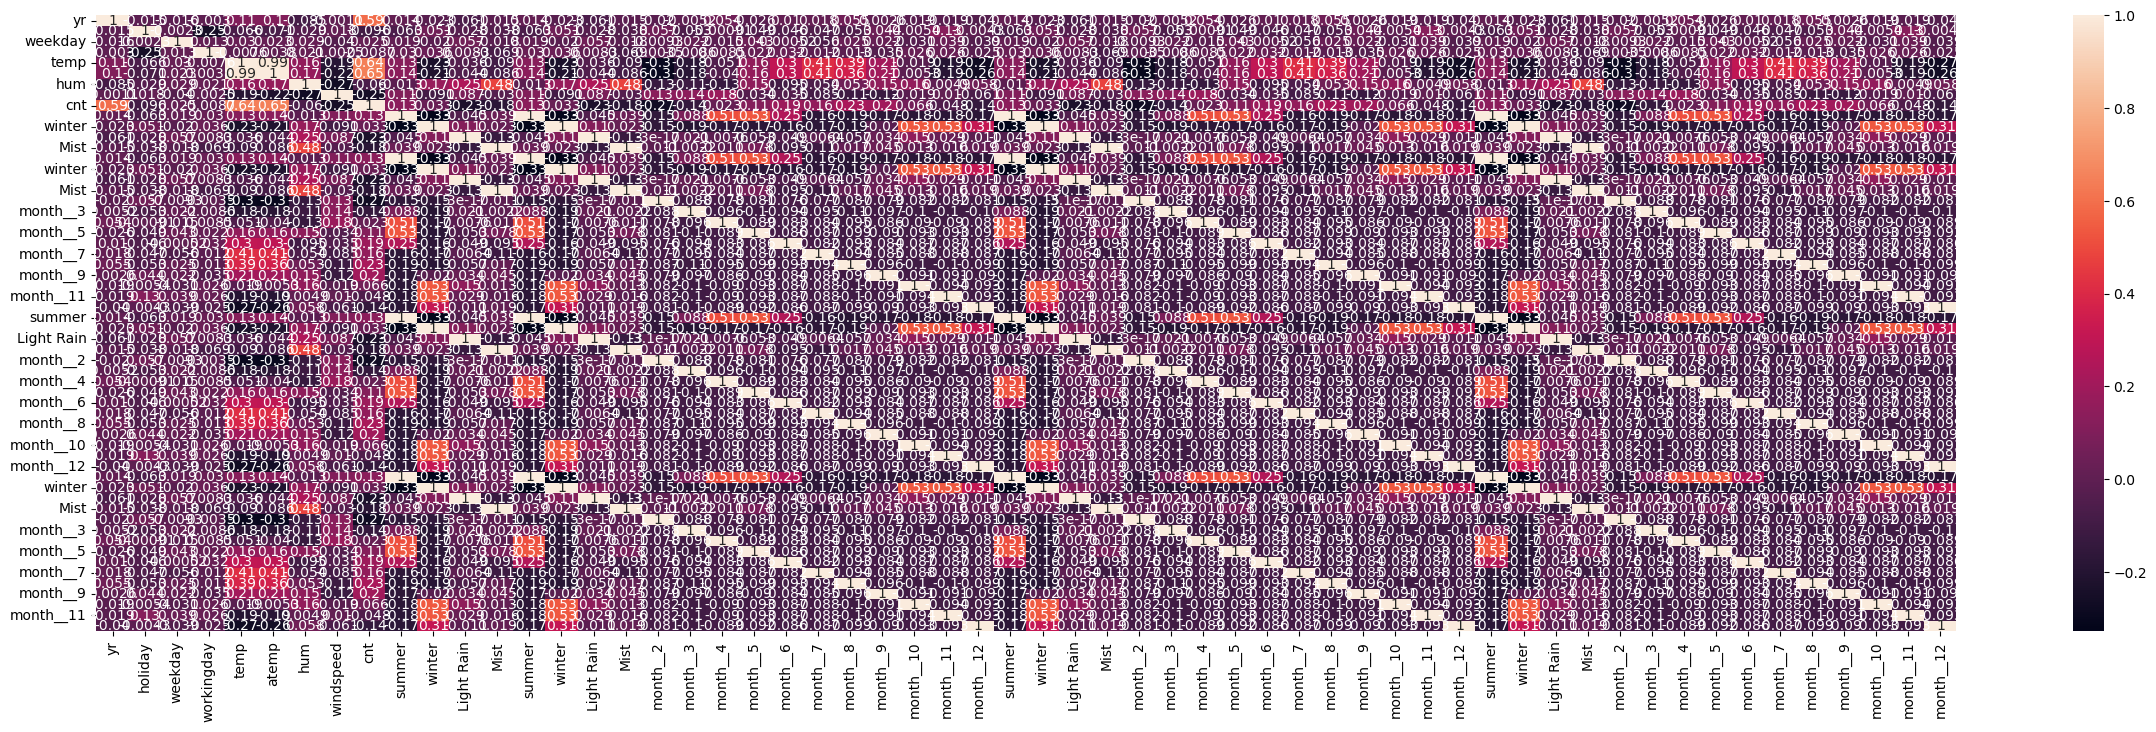

In [278]:
plt.figure(figsize=(30,8))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

### cnt and temp


In [279]:
y_train= df_train.pop('cnt')
X_train= df_train

In [280]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [281]:
X_train.head()

yr  holiday   weekday  workingday      temp     atemp       hum  \
653   1        0  0.500000         1.0  0.509887  0.501133  0.575354   
576   1        0  0.500000         1.0  0.815169  0.766351  0.725633   
426   1        0  0.000000         0.0  0.442393  0.438975  0.640189   
728   1        0  0.166667         1.0  0.245101  0.200348  0.498067   
482   1        0  0.000000         0.0  0.395666  0.391735  0.504508   

     windspeed  summer  winter  ...  month__3  month__4  month__5  month__6  \
653   0.300794       0       1  ...         0         0         0         0   
576   0.264686       0       0  ...         0         0         0         0   
426   0.255342       0       0  ...         1         0         0         0   
728   0.663106       0       0  ...         0         0         0         0   
482   0.188475       1       0  ...         0         1         0         0   

     month__7  month__8  month__9  month__10  month__11  month__12  
653         0         0         0          1          0          0  
576         1         0         0          0          0          0  
426         0         0         0          0          0          0  
728         0         0         0          0          0          1  
482         0         0         0          0          0          0  

[5 rows x 57 columns]

In [282]:
import statsmodels.api as sm

In [283]:
X_train_sm= sm.add_constant(X_train['temp'])


In [284]:
lr=sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()

In [285]:
lr_model.params

const    0.169798
temp     0.639952
dtype: float64

In [286]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           5.80e-61
Time:                        12:07:23   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
X_train_sm= sm.add_constant(X_train[['atemp', 'temp']]) 

In [288]:
lr= sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

In [289]:
lr_model.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [290]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.95e-60
Time:                        12:07:38   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

temp is not significat and R2 squared also does not increase so we will remove this variable

### Build Model-2

In [292]:
#X_train_sm= sm.add_constant(X_train[['yr', 'mnth', 'holiday', 'weekday', 'workingday',
#       'atemp', 'temp', 'hum', 'windspeed',
#       'summer', 'winter', 'Light Rain', 'Mist']])
X_train_sm= sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.1
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          2.27e-182
Time:                        12:08:26   Log-Likelihood:                 519.29
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     486   BIC:                            -889.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2282      0.030      7.668      0.000       0.170       0.287
yr             0.2311      0.008     28.389      0.000       0.215       0.247
holiday       -0.1023      0.027     -3.834      0.000      -0.155      -0.050
weekday        0.0145      0.012      1.185      0.237      -0.010       0.038
workingday    -0.0194      0.009     -2.118      0.035      -0.037      -0.001
temp           0.4139      0.143      2.886      0.004       0.132       0.696
atemp          0.0486      0.140      0.348      0.728      -0.226       0.323
hum           -0.1639      0.039     -4.218      0.000      -0.240      -0.088
windspeed     -0.1871      0.027     -7.044      0.000      -0.239      -0.135
summer         0.0169      0.005      3.371      0.001       0.007       0.027
winter         0.0335      0.006      5.931      0.000       0.022       0.045
Light Rain    -0.0620      0.007     -9.336      0.000      -0.075      -0.049
Mist          -0.0145      0.003     -5.503      0.000      -0.020      -0.009
summer         0.0169      0.005      3.371      0.001       0.007       0.027
winter         0.0335      0.006      5.931      0.000       0.022       0.045
Light Rain    -0.0620      0.007     -9.336      0.000      -0.075      -0.049
Mist          -0.0145      0.003     -5.503      0.000      -0.020      -0.009
month__2       0.0091      0.007      1.307      0.192      -0.005       0.023
month__3       0.0231      0.007      3.102      0.002       0.008       0.038
month__4       0.0259      0.011      2.436      0.015       0.005       0.047
month__5       0.0339      0.012      2.895      0.004       0.011       0.057
month__6       0.0284      0.012      2.350      0.019       0.005       0.052
month__7       0.0211      0.012      1.759      0.079      -0.002       0.045
month__8       0.0408      0.011      3.706      0.000       0.019       0.062
month__9       0.0610      0.010      6.171      0.000       0.042       0.080
month__10      0.0282      0.011      2.576      0.010       0.007       0.050
month__11      0.0127      0.010      1.239      0.216      -0.007       0.033
month__12      0.0102      0.008      1.201      0.230      -0.006       0.027
summer         0.0169      0.005      3.371      0.001       0.007       0.027
winter         0.0335      0.006      5.931      0.000       0.022       0.045
Light Rain    -0.0620      0.007     -9.336      0.000      -0.075      -0.049
Mist          -0.0145      0.003     -5.503      0.000      -0.020      -0.009
month__2       0.0091      0.007      1.307      0.192      -0.005       0.023
month__3       0.0231      0.007      3.102      0.002       0.008       0.038
month__4       0.0259      0.011      2.436      0.015       0.005       0.047
month__5       0.0339      0.012      2.895      0.004       0.011       0.057
mo

### calculate VIF

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

In [296]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


c:\Users\ziyae\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features     VIF
28      winter     inf
29  Light Rain     inf
31    month__2     inf
32    month__3     inf
33    month__4     inf
34    month__5     inf
35    month__6     inf
36    month__7     inf
37    month__8     inf
38    month__9     inf
39   month__10     inf
40   month__11     inf
41   month__12     inf
42      summer     inf
43      winter     inf
44  Light Rain     inf
45        Mist     inf
46    month__2     inf
47    month__3     inf
48    month__4     inf
49    month__5     inf
50    month__6     inf
51    month__7     inf
52    month__8     inf
53    month__9     inf
54   month__10     inf
55   month__11     inf
30        Mist     inf
56   month__12     inf
14  Light Rain     inf
17    month__3     inf
8       summer     inf
9       winter     inf
10  Light Rain     inf
11        Mist     inf
12      summer     inf
13      winter     inf
27      summer     inf
16    month__2     inf
15        Mist     inf
18    month__4     inf
19    month__5     inf
20    month__6     inf
21    month__7     inf
22    month__8     inf
23    month__9     inf
24   month__10     inf
25   month__11     inf
26   month__12     inf
4         temp  444.30
5        atemp  381.16
6          hum   21.85
7    windspeed    4.59
3   workingday    3.69
2      weekday    3.18
0           yr    2.08
1      holiday    1.15

###  atemp is high p value so will try to remove and check again all the coefficient and vif

In [221]:
X= X_train.drop(['atemp'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.7
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          2.15e-183
Time:                        11:55:35   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     487   BIC:                            -895.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2783      0.031      8.858      0.000       0.217       0.340
yr             0.2310      0.008     28.416      0.000       0.215       0.247
holiday       -0.1026      0.027     -3.852      0.000      -0.155      -0.050
weekday        0.0142      0.012      1.167      0.244      -0.010       0.038
workingday    -0.0192      0.009     -2.101      0.036      -0.037      -0.001
temp           0.4611      0.046      9.926      0.000       0.370       0.552
hum           -0.1634      0.039     -4.213      0.000      -0.240      -0.087
windspeed     -0.1890      0.026     -7.293      0.000      -0.240      -0.138
summer         0.0678      0.020      3.390      0.001       0.029       0.107
winter         0.1341      0.023      5.948      0.000       0.090       0.178
Light Rain    -0.2485      0.026     -9.393      0.000      -0.301      -0.197
Mist          -0.0581      0.011     -5.513      0.000      -0.079      -0.037
1             -0.0499      0.020     -2.479      0.014      -0.089      -0.010
2             -0.0226      0.019     -1.178      0.239      -0.060       0.015
3              0.0193      0.014      1.368      0.172      -0.008       0.047
4              0.0279      0.021      1.310      0.191      -0.014       0.070
5              0.0510      0.022      2.280      0.023       0.007       0.095
6              0.0339      0.022      1.574      0.116      -0.008       0.076
7              0.0121      0.022      0.544      0.587      -0.032       0.056
8              0.0708      0.019      3.644      0.000       0.033       0.109
9              0.1322      0.017      7.936      0.000       0.099       0.165
10             0.0346      0.023      1.527      0.127      -0.010       0.079
11            -0.0117      0.023     -0.503      0.615      -0.057       0.034
12            -0.0193      0.020     -0.985      0.325      -0.058       0.019
==============================================================================
Omnibus:                       74.345   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.709
Skew:                          -0.748   Prob(JB):                     1.28e-40
Kurtosis:                       5.531   Cond. No.                     3.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [222]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


Features    VIF
18           8  11.25
15           5  10.70
20          10  10.16
17           7   9.72
16           6   9.35
21          11   8.95
19           9   8.49
14           4   8.13
4         temp   7.00
22          12   6.88
13           3   6.85
8       winter   6.06
11           1   4.97
7       summer   4.72
12           2   4.20
5          hum   2.04
10        Mist   1.60
9   Light Rain   1.27
6    windspeed   1.23
1      holiday   1.12
3   workingday   1.09
0           yr   1.05
2      weekday   1.02

### lets remoce col 11

In [229]:
X.columns["11"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [226]:
X_w= X.drop(['11'], axis=1)
X_train_sm= sm.add_constant(X_w)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

KeyError: "['11'] not found in axis"

In [224]:
vif= pd.DataFrame()
vif['Features']= X_w.columns
vif["VIF"] = [variance_inflation_factor(X_w.values, i)
                          for i in range(len(X_w.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


Features   VIF
2        temp  3.33
3   windspeed  3.03
0          yr  2.00
4      summer  1.50
7        Mist  1.47
5      winter  1.37
6  Light Rain  1.08
1     holiday  1.03

### lets remove hum now

In [166]:
X_w= X_w.drop(['hum'], axis=1)
X_train_sm= sm.add_constant(X_w)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.2
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          5.34e-179
Time:                        11:31:12   Log-Likelihood:                 476.60
No. Observations:                 510   AIC:                            -931.2
Df Residuals:                     499   BIC:                            -884.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1380      0.019      7.271      0.000       0.101       0.175
yr             0.2332      0.009     27.104      0.000       0.216       0.250
mnth           0.0471      0.024      1.985      0.048       0.000       0.094
holiday       -0.1075      0.028     -3.821      0.000      -0.163      -0.052
workingday    -0.0217      0.010     -2.225      0.026      -0.041      -0.003
temp           0.5456      0.025     22.043      0.000       0.497       0.594
windspeed     -0.1618      0.026     -6.197      0.000      -0.213      -0.111
summer         0.0791      0.011      7.327      0.000       0.058       0.100
winter         0.1028      0.017      6.070      0.000       0.070       0.136
Light Rain    -0.2759      0.026    -10.711      0.000      -0.326      -0.225
Mist          -0.0772      0.009     -8.437      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       60.248   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.094
Skew:                          -0.653   Prob(JB):                     3.41e-29
Kurtosis:                       5.112   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
vif= pd.DataFrame()
vif['Features']= X_w.columns
vif["VIF"] = [variance_inflation_factor(X_w.values, i)
                          for i in range(len(X_w.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


Features    VIF
1        mnth  10.85
4        temp   8.71
7      winter   3.90
5   windspeed   3.33
3  workingday   3.16
0          yr   2.01
6      summer   1.57
9        Mist   1.47
2     holiday   1.08
8  Light Rain   1.08

### lets remove mnth

In [168]:
X_w= X_w.drop(['mnth'], axis=1)
X_train_sm= sm.add_constant(X_w)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          2.31e-179
Time:                        11:32:05   Log-Likelihood:                 474.59
No. Observations:                 510   AIC:                            -929.2
Df Residuals:                     500   BIC:                            -886.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1427      0.019      7.556      0.000       0.106       0.180
yr             0.2319      0.009     26.952      0.000       0.215       0.249
holiday       -0.1064      0.028     -3.774      0.000      -0.162      -0.051
workingday    -0.0222      0.010     -2.270      0.024      -0.041      -0.003
temp           0.5741      0.020     28.396      0.000       0.534       0.614
windspeed     -0.1641      0.026     -6.271      0.000      -0.215      -0.113
summer         0.0748      0.011      7.050      0.000       0.054       0.096
winter         0.1287      0.011     11.886      0.000       0.107       0.150
Light Rain    -0.2758      0.026    -10.677      0.000      -0.327      -0.225
Mist          -0.0769      0.009     -8.387      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       56.791   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.802
Skew:                          -0.613   Prob(JB):                     4.81e-28
Kurtosis:                       5.102   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
vif= pd.DataFrame()
vif['Features']= X_w.columns
vif["VIF"] = [variance_inflation_factor(X_w.values, i)
                          for i in range(len(X_w.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


Features   VIF
3        temp  3.91
4   windspeed  3.33
2  workingday  3.16
0          yr  2.01
5      summer  1.51
8        Mist  1.47
6      winter  1.44
1     holiday  1.08
7  Light Rain  1.08

### lets remove working day

In [171]:
X_w= X_w.drop(['workingday'], axis=1)
X_train_sm= sm.add_constant(X_w)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.747e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:13   Log-Likelihood:                 1641.3
No. Observations:                 510   AIC:                            -3265.
Df Residuals:                     501   BIC:                            -3227.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1257      0.002     71.507      0.000       0.122       0.129
yr             0.2320      0.001    265.950      0.000       0.230       0.234
holiday       -0.0898      0.003    -32.530      0.000      -0.095      -0.084
temp           0.5752      0.002    280.652      0.000       0.571       0.579
windspeed     -0.1639      0.003    -61.790      0.000      -0.169      -0.159
summer         0.0739      0.001     68.718      0.000       0.072       0.076
winter         0.1273      0.001    116.134      0.000       0.125       0.129
Light Rain    -0.2749      0.003   -104.951      0.000      -0.280      -0.270
Mist          -0.0751      0.001    -81.059      0.000      -0.077      -0.073
==============================================================================
Omnibus:                      114.185   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.356
Skew:                           1.037   Prob(JB):                     8.04e-24
Kurtosis:                       2.159   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
vif= pd.DataFrame()
vif['Features']= X_w.columns
vif["VIF"] = [variance_inflation_factor(X_w.values, i)
                          for i in range(len(X_w.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


Features   VIF
2        temp  3.33
3   windspeed  3.03
0          yr  2.00
4      summer  1.50
7        Mist  1.47
5      winter  1.37
6  Light Rain  1.08
1     holiday  1.03

#### Now all are VIF are below 5 and all p value are below 0.05 so this model is the final one


## Step 4 Residual Anaylysis

c:\Users\ziyae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


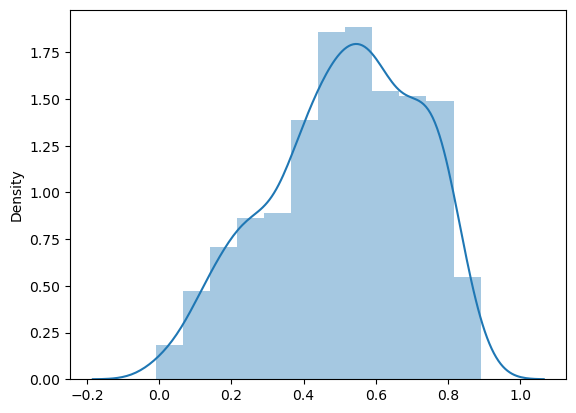

In [173]:
y_train_pred= lr_model.predict(X_train_sm)
res= y_train= y_train_pred
sns.distplot(res)
plt.show()